<a href="https://colab.research.google.com/github/Leo-xxx12/bootcamp_Leo_Xu/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import time

a = np.arange(1, 11)
b = np.linspace(0.0, 1.0, 10)

# Elementwise operations
sum_ab      = a + b
prod_ab     = a * b
sq_a        = a**2
sqrt_a      = np.sqrt(a)
scaled_a    = 2.5 * a + 1
mask        = a % 2 == 0
evens_plus1 = a[mask] + 1

print("a:            ", a)
print("b:            ", b)
print("a + b:        ", sum_ab)
print("a * b:        ", prod_ab)
print("a**2:         ", sq_a)
print("sqrt(a):      ", sqrt_a)
print("2.5*a + 1:    ", scaled_a)
print("even a + 1:   ", evens_plus1)

# Broadcasting demo: add row vector to each row of a matrix
M = np.arange(12).reshape(3, 4)
row = np.array([10, 20, 30, 40])
M_plus_row = M + row
print("\nM:\n", M)
print("M + row:\n", M_plus_row)

# -----------------------------
# 2) Loop vs Vectorized timing
# Task: compute y = x^2 + 2x + 1 (elementwise)
# -----------------------------
N = 5_000_000
x = np.random.randn(N).astype(np.float64)

# --- Plain Python loop (slow) ---
def poly_loop(x_arr):
    y = np.empty_like(x_arr)
    for i in range(x_arr.size):
        xi = float(x_arr[i])
        y[i] = xi*xi + 2*xi + 1
    return y

start = time.time()
y_loop = poly_loop(x)
t_loop = time.time() - start
print(f"\nLoop time:        {t_loop:.3f} s")

# --- Vectorized NumPy (fast) ---
start = time.time()
y_vec = x*x + 2*x + 1
t_vec = time.time() - start
print(f"Vectorized time:  {t_vec:.3f} s")

max_abs_diff = np.max(np.abs(y_loop - y_vec))
print(f"Max abs diff:     {max_abs_diff:.3e}")

def sumsq_loop(x_arr):
    s = 0.0
    for xi in x_arr:
        s += xi*xi
    return s

start = time.time()
s1 = sumsq_loop(x)
t1 = time.time() - start

start = time.time()
s2 = np.dot(x, x)  # or (x*x).sum()
t2 = time.time() - start

print(f"\nSum of squares (loop): {s1:.6f} in {t1:.3f} s")
print(f"Sum of squares (vec):  {s2:.6f} in {t2:.3f} s")


a:             [ 1  2  3  4  5  6  7  8  9 10]
b:             [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
a + b:         [ 1.          2.11111111  3.22222222  4.33333333  5.44444444  6.55555556
  7.66666667  8.77777778  9.88888889 11.        ]
a * b:         [ 0.          0.22222222  0.66666667  1.33333333  2.22222222  3.33333333
  4.66666667  6.22222222  8.         10.        ]
a**2:          [  1   4   9  16  25  36  49  64  81 100]
sqrt(a):       [1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.         3.16227766]
2.5*a + 1:     [ 3.5  6.   8.5 11.  13.5 16.  18.5 21.  23.5 26. ]
even a + 1:    [ 3  5  7  9 11]

M:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
M + row:
 [[10 21 32 43]
 [14 25 36 47]
 [18 29 40 51]]

Loop time:        5.205 s
Vectorized time:  0.100 s
Max abs diff:     0.000e+00

Sum of squares (loop): 5001002.456816 in 1.122 s
Sum of squares (vec):  5001

In [3]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Copy of starter_data.csv"


df = pd.read_csv(file_path)
print(df.info())
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes
None
  category  value        date
0        A     10  2025-08-01
1        B     15  2025-08-02
2        A     12  2025-08-03
3        B     18  2025-08-04
4        C     25  2025-08-05


In [5]:
print("\nColumns:", df.columns.tolist())

# Pick columns robustly
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = df.select_dtypes(include="number").columns.tolist()

if not cat_cols:
    # fallback: make a categorical bin from the first numeric column
    first_num = num_cols[0]
    df["AutoCategory"] = pd.qcut(df[first_num], q=4, duplicates="drop")
    cat_col = "AutoCategory"
else:
    cat_col = cat_cols[0]   # choose the first categorical; change if you prefer another

print(f"\nUsing category column: {cat_col}")
print(f"Numeric columns to aggregate: {num_cols}")

# Summary stats for numeric columns
print("\n--- .describe() ---")
print(df[num_cols].describe())

# Groupby aggregation
agg = df.groupby(cat_col)[num_cols].agg(["mean", "min", "max", "count"])
print("\n--- Groupby Aggregation ---")
print(agg)


Columns: ['category', 'value', 'date']

Using category column: category
Numeric columns to aggregate: ['value']

--- .describe() ---
           value
count  10.000000
mean   17.600000
std     7.381659
min    10.000000
25%    12.250000
50%    14.500000
75%    23.250000
max    30.000000

--- Groupby Aggregation ---
              value              
               mean min max count
category                         
A         11.500000  10  13     4
B         15.666667  14  18     3
C         27.666667  25  30     3


✅ Saved summary to data/processed/summary.csv and .json
✅ Saved plot to data/processed/summary_plot.png


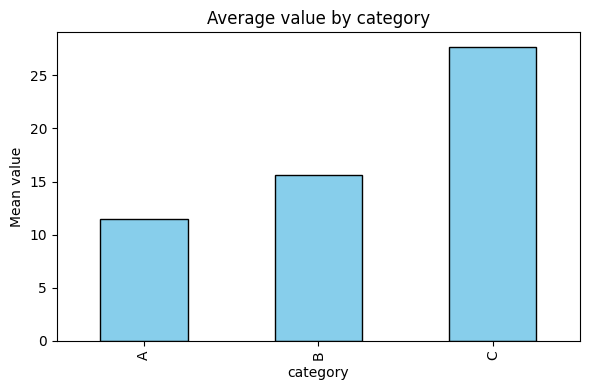

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# Pick category + numeric columns (adjust names to your dataset)
cat_col = df.select_dtypes(include=["object", "category"]).columns[0]
num_cols = df.select_dtypes(include="number").columns.tolist()

# Compute summary
summary = df.groupby(cat_col)[num_cols].agg(["mean", "min", "max", "count"])

# -----------------------------
# 1) Save to CSV and JSON
# -----------------------------
os.makedirs("data/processed", exist_ok=True)   # ensure folder exists

summary.to_csv("data/processed/summary.csv")
summary.to_json("data/processed/summary.json", orient="records", lines=True)

print("✅ Saved summary to data/processed/summary.csv and .json")

# -----------------------------
# 2) Create and save a plot
# -----------------------------
# Example: bar plot of mean of the first numeric column by category
first_num = num_cols[0]
plot_data = df.groupby(cat_col)[first_num].mean()

plt.figure(figsize=(6,4))
plot_data.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title(f"Average {first_num} by {cat_col}")
plt.xlabel(cat_col)
plt.ylabel(f"Mean {first_num}")
plt.tight_layout()

plt.savefig("data/processed/summary_plot.png", dpi=300)
print("✅ Saved plot to data/processed/summary_plot.png")

In [7]:

import pandas as pd

def get_summary_stats(df, cat_col=None):

    if cat_col is None:
        cat_candidates = df.select_dtypes(include=["object", "category"]).columns.tolist()
        if not cat_candidates:
            raise ValueError("No categorical column found. Please specify cat_col.")
        cat_col = cat_candidates[0]

    num_cols = df.select_dtypes(include="number").columns.tolist()

    summary = df.groupby(cat_col)[num_cols].agg(["mean", "min", "max", "count"])
    return summary
